In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import glob
from matplotlib.pyplot import figure
from os.path import expanduser
home = expanduser("~")
from pymatgen.analysis.ferroelectricity.polarization import Polarization
from pymatgen.util.coord import get_angle
from pymatgen.core.structure import Structure
from pymatgen.core.structure import Lattice
import pymatgen.io.vasp.outputs as vo
from pymatgen.io.vasp.outputs import Outcar
import warnings
warnings.filterwarnings('ignore')
os.chdir(f"{home}/nn9301k")
%run maxforceselective.ipynb

In [192]:
init_angle = 90
final_angle = 78
angles = []
intermediates = 24
magmomstot = []
magmomsFeX = []
magmomsFeY = []
magmomsFeZ = []
energies = []
volumes = []
lattconstc = []
areas = []

os.chdir(f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A111/448") # w/SOC for correct energy curve
outcar = Outcar("OUTCAR")
magmomFeX = outcar.magnetization[12]['tot'][0]
magmomFeY = outcar.magnetization[12]['tot'][1]
magmomFeZ = outcar.magnetization[12]['tot'][2]
magmomsFeX.append(magmomFeX)
magmomsFeY.append(magmomFeY)
magmomsFeZ.append(magmomFeZ)
poscar = Structure.from_file("CONTCAR")
volumes.append(poscar.volume)
lattconstc.append(poscar.as_dict()['lattice']['b'])
energies.append(outcar.final_energy)
angles.append(90.0)
areas.append(np.sin(90/180*np.pi)*(poscar.as_dict()['lattice']['a']*poscar.as_dict()['lattice']['c']))

print(angles)
print(magmomsFeX)
print(magmomsFeY)
print(magmomsFeZ)
maxforceselective("OUTCAR")

for i in range(2, intermediates + 1, 2):
    path = f"{home}/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A111/shear/ac/80/{i}/"
    poscar = Structure.from_file(path + "CONTCAR")
    angle = round(poscar.as_dict()['lattice']['beta'], 1)
    angles.append(angle)
    os.chdir(path)
    outcar = Outcar(path + "OUTCAR")
    
    areas.append(np.sin(angle/180*np.pi)*(poscar.as_dict()['lattice']['a']*poscar.as_dict()['lattice']['c']))
    volumes.append(poscar.volume)
    lattconstc.append(poscar.as_dict()['lattice']['b'])

    logfiles = glob.glob('slurm*')
    logfile = logfiles[len(logfiles) - 1]
    f = open(logfile)
    lines = f.readlines()
    f.close()

    for line in lines:
        if 'F=' in line:
            lastline = line
    
    splitline = lastline.split()
    magmomtot = np.array([splitline[len(splitline) - 3], 
                       splitline[len(splitline) - 2], 
                       splitline[len(splitline) - 1]]).astype('float')
    magmomstot.append(magmomtot)
    #magmomFeY = 0
    #for i in outcar.magnetization[12:16]:
    #    magmomFeY += i['tot'][1] # extracting y spin component
    magmomFeX = outcar.magnetization[12]['tot'][0]
    magmomFeY = outcar.magnetization[12]['tot'][1]
    magmomFeZ = outcar.magnetization[12]['tot'][2]
    magmomsFeX.append(magmomFeX)
    magmomsFeY.append(magmomFeY)
    magmomsFeZ.append(magmomFeZ)
    energies.append(outcar.final_energy)
    
    print(angle)
    print(magmomtot)
    print(magmomFeX)
    print(magmomFeY)
    print(magmomFeZ)
    maxforceselective(path + "OUTCAR")

angles.reverse()
areas.reverse()
magmomstot.reverse()
magmomsFeX.reverse()
magmomsFeY.reverse()
magmomsFeZ.reverse()
energies.reverse()
volumes.reverse()
lattconstc.reverse()

[90.0]
[0.0]
[0.0]
[3.74]
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00078	  	1	0.10	 	0.0000	 	-82.26753461
89.0
[ 0.     -0.0034  0.    ]
0.001
-0.0
3.74
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00078	  	3	0.24	 	0.0041	 	-82.26057320
88.0
[-0.     -0.0077  0.    ]
0.001
-0.001
3.739
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00086	  	3	0.32	 	0.0049	 	-82.23641053
87.0
[ 0.     -0.0052  0.    ]
0.001
-0.001
3.738
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00086	  	3	0.32	 	0.0012	 	-82.19626010
86.0
[ 0.     -0.0155 -0.    ]
0.002
-0.002
3.737
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00096	  	3	0.25	 	0.0046	 	-82.13994177
85.0
[ 0.     -0.0208  0.    ]
0.007
-0.002
3.735
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00111	  	3	0.14	 	0.0027	 	-82.06734889
84.0
[ 0.     -0.0115 -0.    ]
-0.021
-0.003
3.733
 	Maxforce	atom#	Pressure	Maxdrift	TOTEN
 	0.00112	  	3	-0.07	 	0.0026	 	-81.97916006
83.0
[-0.     -0.0158  0.    ]
-0.031
-0.004
3.731
 	Maxforce	atom#	Pressure	Max

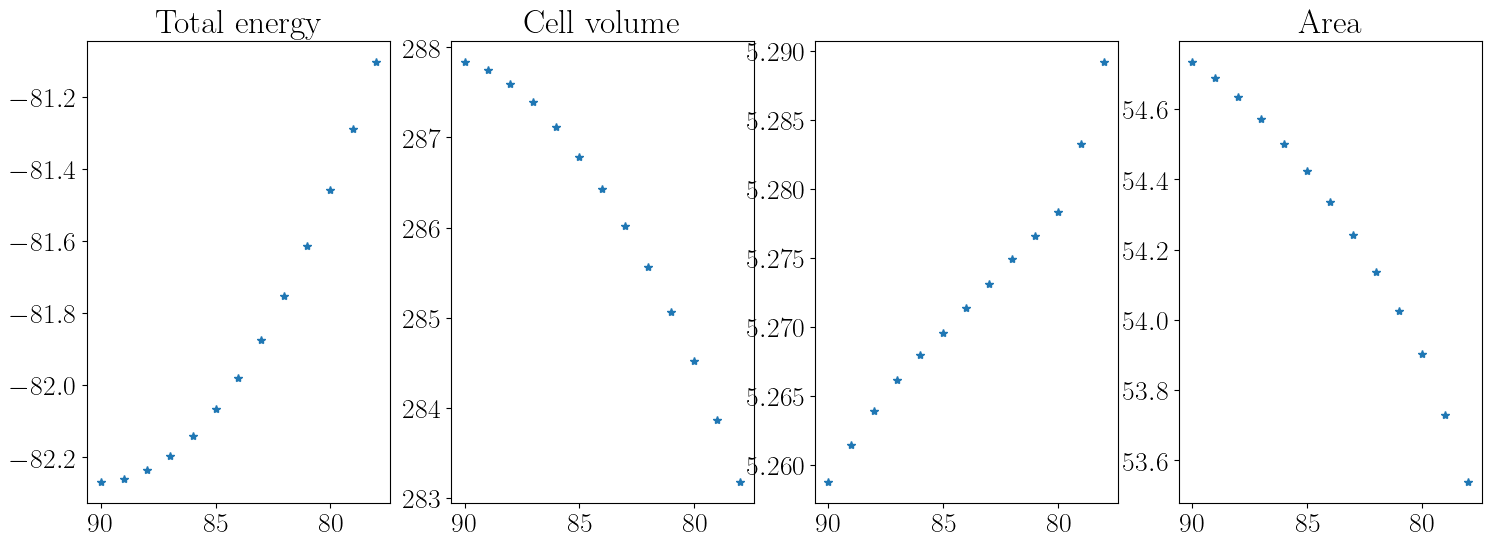

In [193]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,6))
ax1.plot(angles, energies, '*')
ax1.invert_xaxis()
ax1.set_title("Total energy")
ax2.plot(angles, volumes, '*')
ax2.set_title("Cell volume")
ax2.invert_xaxis()
ax3.plot(angles, lattconstc, '*')
#ax3.set_title("Lattice constant b")
ax3.invert_xaxis()
ax4.plot(angles, areas, '*')
ax4.set_title("Area")
ax4.invert_xaxis()

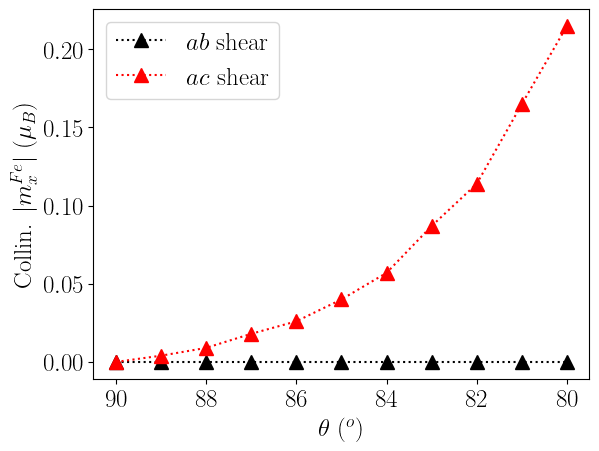

In [14]:
# ac plane A111/shear/ac/80/[1-24]
mx = [0.0, 0.004, 0.009, 0.018, 0.026, 0.04, 0.057, 0.087, 0.114, 0.165, 0.215]
angles = [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80]

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
        "font.weight": "normal",
        "font.style": "normal",
    "mathtext.default": "regular"
    })

fig, ax = plt.subplots();
sz = 10
ax.plot(angles, np.zeros(len(mx)), "k^:", markersize = sz, label="$ab$ shear")
ax.plot(angles, mx, "r^:", markersize = sz, label="$ac$ shear")
ax.set_xlabel('$\\theta$ ($^o$)')
ax.set_xticks(np.arange(80, 91, 2))
ax.set_ylabel('Collin. $|m^{Fe}_x|$ ($\mu_B$)'); ax.invert_xaxis()
plt.legend()

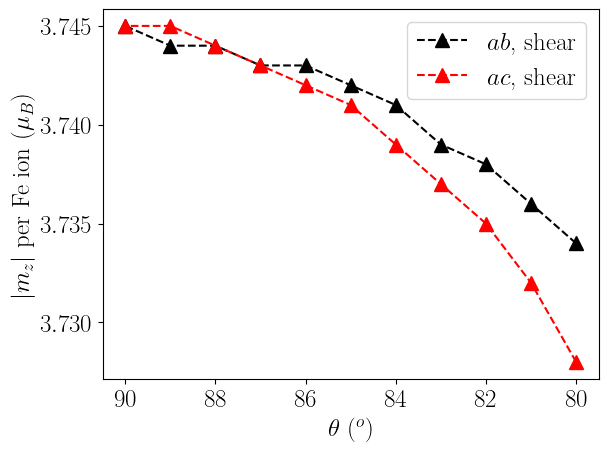

In [212]:
# A221 models

magmomsFeZac2 = [3.728, 3.732, 3.735, 3.737, 3.739, 3.741, 3.742, 3.743, 3.744, 3.745, 3.745]
magmomsFeZab2 = [3.734, 3.736, 3.738, 3.739, 3.741, 3.742, 3.743, 3.743, 3.744, 3.744, 3.745]
angles_ab = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

fig, ax = plt.subplots();
sz = 10
ax.plot(angles_ab, magmomsFeZab2, "k^--", markersize=sz, label="$ab$, shear")
ax.plot(angles_ab, magmomsFeZac2, "r^--", markersize=sz, label="$ac$, shear")

ax.set_xlabel('$\\theta$ ($^o$)')
ax.set_ylabel('$|m_z|$ per Fe ion ($\mu_B$)')
ax.set_xticks(np.arange(80, 91, 2))
ax.invert_xaxis()
plt.legend()

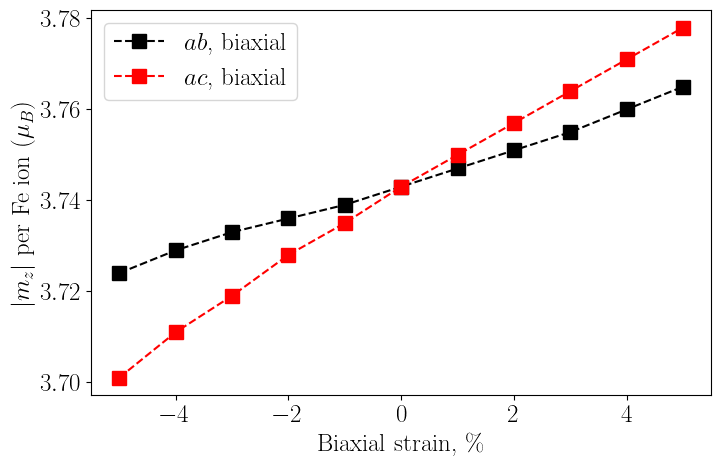

In [213]:
magmoms_ab_biax = [3.724, 3.729, 3.733, 3.736, 3.739, 3.743, 3.747, 3.751, 3.755, 3.76, 3.765]
magmoms_ac_biax = [3.701, 3.711, 3.719, 3.728, 3.735, 3.743, 3.75, 3.757, 3.764, 3.771, 3.778]

fig, (ax1) = plt.subplots(figsize=(8,5))

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
        "font.weight": "normal",
        "font.style": "normal",
    "mathtext.default": "regular"
    })

strains = list(range(-5,6))
ax1.plot(strains, magmoms_ab_biax, 'sk--', markersize=10, label="$ab$, biaxial")
ax1.plot(strains, magmoms_ac_biax, 'rs--', markersize=10, label="$ac$, biaxial")
ax1.set_ylabel('$|m_z|$ per Fe ion ($\mu_B$)')
plt.xticks([-4, -2, 0, 2, 4])
ax1.set_xlabel('Biaxial strain, \%')
plt.legend()
#plt.savefig(f'magmomsabfixz.pdf', format="pdf", bbox_inches="tight")
plt.show()

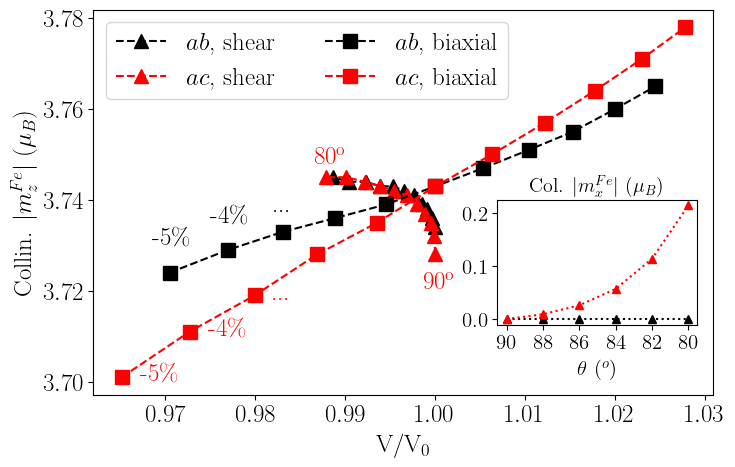

In [294]:
volumes_abfix = np.array([0.97049007, 0.97696581, 0.98309419, 0.98886234, 0.99450256,
                1.00000243, 1.00533017, 1.01036205, 1.01526181, 1.01995851, 1.02444356])
volumes_acfix = np.array([0.96516677, 0.97270045, 0.97992945, 0.98686306, 0.99353134,
                1. , 1.00626561, 1.01217398, 1.01768814, 1.02291126, 1.02776219])
vol221_0 = 1151.2831113542254 # supercell
volumes_acshear = np.array([vol221_0, 1151.14, 1150.70, 1150.02, 1149.00, 1147.63, 1146.06, 1144.27, 1142.25, 1139.91, 1137.34])/vol221_0
volumes_abshear = np.array([vol221_0, 1150.91, 1150.28, 1149.55, 1148.54, 1147.31, 1145.88, 1144.23, 1142.38, 1140.26, 1138.16])/vol221_0

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(volumes_abshear, magmomsFeZab2, "k^--", markersize=sz, label="$ab$, shear")
ax.plot(volumes_acshear, magmomsFeZac2, "r^--", markersize=sz, label="$ac$, shear")
ax.plot(volumes_abfix, magmoms_ab_biax, 'ks--', markersize=sz, label="$ab$, biaxial")
ax.plot(volumes_acfix, magmoms_ac_biax, 'rs--', markersize=sz, label="$ac$, biaxial")

offsetx = 0.002
offsety = 0.003
for i, s in enumerate(strains[0:2]):
    ax.annotate(f"{s}\%", (volumes_abfix[i], magmoms_ab_biax[i]), 
               (volumes_abfix[i] - offsetx*1, magmoms_ab_biax[i] + offsety*2))
    ax.annotate(f"{s}\%", (volumes_acfix[i], magmoms_ac_biax[i]), 
               (volumes_acfix[i] + offsetx*1, magmoms_ac_biax[i] - offsety*0.3), color="red")

ax.annotate("...", (volumes_abfix[i+1], magmoms_ab_biax[i+1]), 
            (volumes_abfix[i+1] - offsetx*0.5, magmoms_ab_biax[i+1] + offsety*1.5))
ax.annotate("...", (volumes_acfix[i+1], magmoms_ac_biax[i+1]),
            (volumes_acfix[i+1] + offsetx, magmoms_ac_biax[i+1] - offsety*0.3), color="red")

ax.annotate(f"{90}"+"\\textsuperscript{o}", (volumes_acshear[0], magmomsFeZac2[0]), 
    (volumes_acshear[0] - offsetx*0.7, magmomsFeZac2[0]-offsety*2.5), color="red")
ax.annotate(f"{80}"+"\\textsuperscript{o}", (volumes_acshear[10], magmomsFeZac2[10]), 
    (volumes_acshear[10] - offsetx*0.7, magmomsFeZac2[10]+offsety), color="red")

ax.set_xlabel('V/V$_0$')
ax.set_ylabel('Collin. $|m^{Fe}_z|$ ($\mu_B$)')
#ax.set_yticks([3.69, 3.71, 3.73, 3.75, 3.77])
plt.legend(ncol=2)

plt.rcParams.update({'font.size': 15})
sz2 = 6
ax2 = fig.add_axes([left := 0.63, bottom := 0.25, width := 0.25, height := 0.25])
ax2.plot(angles[::2], (np.zeros(len(mx)))[::2], "k^:", markersize = sz2, label="$ab$ shear")
ax2.plot(angles[::2], mx[::2], "r^:", markersize = sz2, label="$ac$ shear")
ax2.set_xlabel('$\\theta$ ($^o$)')
ax2.set_xticks(np.arange(80, 91, 2))
ax2.set_yticks([0.0, 0.1, 0.2])
plt.rcParams.update({'font.size': 12})
ax2.set_title('Col. $|m^{Fe}_x|$ ($\mu_B$)')
#ax2.set_ylabel('Col. $|m^{Fe}_x|$ ($\mu_B$)'); 
ax2.invert_xaxis()
plt.rcParams.update({'font.size': 18})

'plt.rcParams.update({\'font.size\': 15})\nsz2 = 6\nax2 = fig.add_axes([left := 0.63, bottom := 0.25, width := 0.25, height := 0.25])\nax2.plot(angles[::2], (np.zeros(len(mx)))[::2], "k^:", markersize = sz2, label="$ab$ shear")\nax2.plot(angles[::2], mx[::2], "r^:", markersize = sz2, label="$ac$ shear")\nax2.set_xlabel(\'$\\theta$ ($^o$)\')\nax2.set_xticks(np.arange(80, 91, 2))\nax2.set_yticks([0.0, 0.1, 0.2])\nplt.rcParams.update({\'font.size\': 12})\nax2.set_title(\'Col. $|m^{Fe}_x|$ ($\\mu_B$)\')\n#ax2.set_ylabel(\'Col. $|m^{Fe}_x|$ ($\\mu_B$)\'); \nax2.invert_xaxis()\nplt.rcParams.update({\'font.size\': 18})'

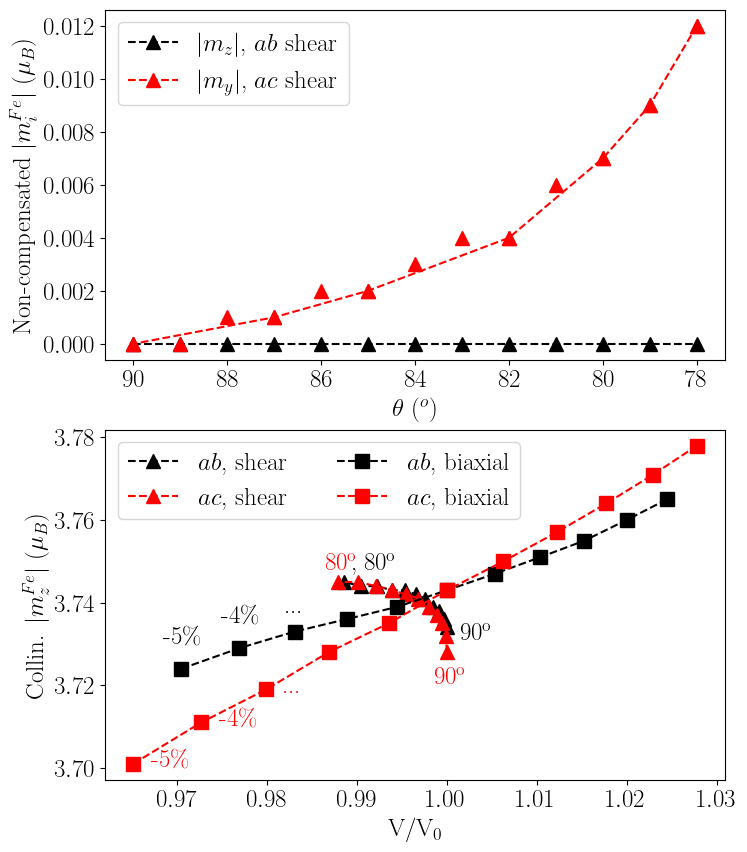

In [303]:
# data here: ~/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A111/shear/ac/80/[2-24] (not nrlx subdir)
m_y_angle = [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78]
magmomsFeY_env = np.array([0, 0.001, 0.002, 0.004, 0.007, 0.009, 0.012])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(8,10))
ax0.plot(m_y_angle, np.zeros(len(m_y_angle)), "k^--", markersize=10, label="$|m_z|$, $ab$ shear")
ax0.plot(m_y_angle, abs(np.flip(np.array(magmomsFeY))), "r^", markersize=10)
ax0.plot([78, 79, 80, 82, 85, 87, 90], abs(np.flip(magmomsFeY_env)), "r^--", markersize=10, label="$|m_y|$, $ac$ shear")
ax0.set_xlabel('$\\theta$ ($^o$)')
ax0.set_xticks(np.arange(90, 77, -2))
ax0.set_ylabel('Non-compensated $|m^{Fe}_i|$ ($\mu_B$)')
ax0.invert_xaxis()
ax0.legend()
#plt.savefig(f"{home}/nn9301k/piezomag_fe_80_ab_ac.pdf", format="pdf", bbox_inches="tight")

volumes_abfix = np.array([0.97049007, 0.97696581, 0.98309419, 0.98886234, 0.99450256,
                1.00000243, 1.00533017, 1.01036205, 1.01526181, 1.01995851, 1.02444356])
volumes_acfix = np.array([0.96516677, 0.97270045, 0.97992945, 0.98686306, 0.99353134,
                1. , 1.00626561, 1.01217398, 1.01768814, 1.02291126, 1.02776219])
vol221_0 = 1151.2831113542254 # supercell
volumes_acshear = np.array([vol221_0, 1151.14, 1150.70, 1150.02, 1149.00, 1147.63, 1146.06, 1144.27, 1142.25, 1139.91, 1137.34])/vol221_0
volumes_abshear = np.array([vol221_0, 1150.91, 1150.28, 1149.55, 1148.54, 1147.31, 1145.88, 1144.23, 1142.38, 1140.26, 1138.16])/vol221_0

plt.rcParams.update({'font.size': 18})
ax1.plot(volumes_abshear, magmomsFeZab2, "k^--", markersize=sz, label="$ab$, shear")
ax1.plot(volumes_acshear, magmomsFeZac2, "r^--", markersize=sz, label="$ac$, shear")
ax1.plot(volumes_abfix, magmoms_ab_biax, 'ks--', markersize=sz, label="$ab$, biaxial")
ax1.plot(volumes_acfix, magmoms_ac_biax, 'rs--', markersize=sz, label="$ac$, biaxial")

offsetx = 0.002
offsety = 0.003
for i, s in enumerate(strains[0:2]):
    ax1.annotate(f"{s}\%", (volumes_abfix[i], magmoms_ab_biax[i]), 
               (volumes_abfix[i] - offsetx*1, magmoms_ab_biax[i] + offsety*2))
    ax1.annotate(f"{s}\%", (volumes_acfix[i], magmoms_ac_biax[i]), 
               (volumes_acfix[i] + offsetx*1, magmoms_ac_biax[i] - offsety*0.3), color="red")

ax1.annotate("...", (volumes_abfix[i+1], magmoms_ab_biax[i+1]), 
            (volumes_abfix[i+1] - offsetx*0.5, magmoms_ab_biax[i+1] + offsety*1.5))
ax1.annotate("...", (volumes_acfix[i+1], magmoms_ac_biax[i+1]),
            (volumes_acfix[i+1] + offsetx, magmoms_ac_biax[i+1] - offsety*0.3), color="red")

ax1.annotate(f"{90}"+"\\textsuperscript{o}", (volumes_acshear[0], magmomsFeZac2[0]), 
    (volumes_acshear[0] - offsetx*0.7, magmomsFeZac2[0]-offsety*2.5), color="red")
ax1.annotate(f"{90}"+"\\textsuperscript{o}", (volumes_abshear[0], magmomsFeZab2[0]), 
    (volumes_abshear[0] + offsetx*.7, magmomsFeZab2[0]-offsety*1.), color="black")
ax1.annotate(f"{80}"+"\\textsuperscript{o}", (volumes_acshear[10], magmomsFeZac2[10]), 
    (volumes_acshear[10] - offsetx*0.7, magmomsFeZac2[10]+offsety), color="red")
ax1.annotate(", 80\\textsuperscript{o}", (volumes_abshear[10], magmomsFeZab2[10]), 
    (volumes_abshear[10] + offsetx*0.5, magmomsFeZab2[10]+offsety), color="black")

ax1.set_xlabel('V/V$_0$')
ax1.set_ylabel('Collin. $|m^{Fe}_z|$ ($\mu_B$)')
#ax1.set_yticks([3.69, 3.71, 3.73, 3.75, 3.77])
ax1.legend(ncol=2)

'''plt.rcParams.update({'font.size': 15})
sz2 = 6
ax2 = fig.add_axes([left := 0.63, bottom := 0.25, width := 0.25, height := 0.25])
ax2.plot(angles[::2], (np.zeros(len(mx)))[::2], "k^:", markersize = sz2, label="$ab$ shear")
ax2.plot(angles[::2], mx[::2], "r^:", markersize = sz2, label="$ac$ shear")
ax2.set_xlabel('$\\theta$ ($^o$)')
ax2.set_xticks(np.arange(80, 91, 2))
ax2.set_yticks([0.0, 0.1, 0.2])
plt.rcParams.update({'font.size': 12})
ax2.set_title('Col. $|m^{Fe}_x|$ ($\mu_B$)')
#ax2.set_ylabel('Col. $|m^{Fe}_x|$ ($\mu_B$)'); 
ax2.invert_xaxis()
plt.rcParams.update({'font.size': 18})'''

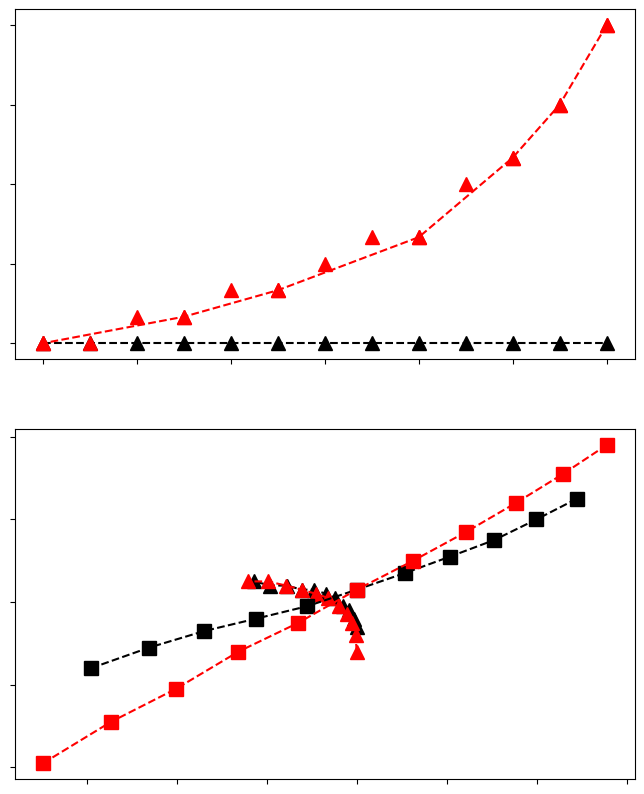

In [308]:
# data here: ~/nn9301k/CuFeS2/pbesol/pbesol/dftu4/7/A111/shear/ac/80/[2-24] (not nrlx subdir)
m_y_angle = [90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78]
magmomsFeY_env = np.array([0, 0.001, 0.002, 0.004, 0.007, 0.009, 0.012])

fig, (ax0, ax1) = plt.subplots(2,1, figsize=(8,10))
ax0.plot(m_y_angle, np.zeros(len(m_y_angle)), "k^--", markersize=10, label="$|m_z|$, $ab$ shear")
ax0.plot(m_y_angle, abs(np.flip(np.array(magmomsFeY))), "r^", markersize=10)
ax0.plot([78, 79, 80, 82, 85, 87, 90], abs(np.flip(magmomsFeY_env)), "r^--", markersize=10, label="$|m_y|$, $ac$ shear")
#ax0.set_xlabel('$\\theta$ ($^o$)')
ax0.set_xticks(np.arange(90, 77, -2))
ax0.set_yticks([0, 0.003, 0.006, 0.009, 0.012])
#ax0.set_ylabel('Non-compensated $|m^{Fe}_i|$ ($\mu_B$)')
ax0.invert_xaxis()
ax0.xaxis.set_tick_params(labelbottom=False)
ax0.yaxis.set_tick_params(labelleft=False)
#ax0.legend()
#plt.savefig(f"{home}/nn9301k/piezomag_fe_80_ab_ac.pdf", format="pdf", bbox_inches="tight")

volumes_abfix = np.array([0.97049007, 0.97696581, 0.98309419, 0.98886234, 0.99450256,
                1.00000243, 1.00533017, 1.01036205, 1.01526181, 1.01995851, 1.02444356])
volumes_acfix = np.array([0.96516677, 0.97270045, 0.97992945, 0.98686306, 0.99353134,
                1. , 1.00626561, 1.01217398, 1.01768814, 1.02291126, 1.02776219])
vol221_0 = 1151.2831113542254 # supercell
volumes_acshear = np.array([vol221_0, 1151.14, 1150.70, 1150.02, 1149.00, 1147.63, 1146.06, 1144.27, 1142.25, 1139.91, 1137.34])/vol221_0
volumes_abshear = np.array([vol221_0, 1150.91, 1150.28, 1149.55, 1148.54, 1147.31, 1145.88, 1144.23, 1142.38, 1140.26, 1138.16])/vol221_0

plt.rcParams.update({'font.size': 18})
ax1.plot(volumes_abshear, magmomsFeZab2, "k^--", markersize=sz, label="$ab$, shear")
ax1.plot(volumes_acshear, magmomsFeZac2, "r^--", markersize=sz, label="$ac$, shear")
ax1.plot(volumes_abfix, magmoms_ab_biax, 'ks--', markersize=sz, label="$ab$, biaxial")
ax1.plot(volumes_acfix, magmoms_ac_biax, 'rs--', markersize=sz, label="$ac$, biaxial")

ax1.xaxis.set_tick_params(labelbottom=False)
ax1.yaxis.set_tick_params(labelleft=False)

offsetx = 0.002
offsety = 0.003
#for i, s in enumerate(strains[0:2]):
#    ax1.annotate(f"{s}\%", (volumes_abfix[i], magmoms_ab_biax[i]), 
#               (volumes_abfix[i] - offsetx*1, magmoms_ab_biax[i] + offsety*2))
#    ax1.annotate(f"{s}\%", (volumes_acfix[i], magmoms_ac_biax[i]), 
#               (volumes_acfix[i] + offsetx*1, magmoms_ac_biax[i] - offsety*0.3), color="red")

#ax1.annotate("...", (volumes_abfix[i+1], magmoms_ab_biax[i+1]), 
#            (volumes_abfix[i+1] - offsetx*0.5, magmoms_ab_biax[i+1] + offsety*1.5))
#ax1.annotate("...", (volumes_acfix[i+1], magmoms_ac_biax[i+1]),
#            (volumes_acfix[i+1] + offsetx, magmoms_ac_biax[i+1] - offsety*0.3), color="red")

#ax1.annotate(f"{90}"+"\\textsuperscript{o}", (volumes_acshear[0], magmomsFeZac2[0]), 
#    (volumes_acshear[0] - offsetx*0.7, magmomsFeZac2[0]-offsety*2.5), color="red")
#ax1.annotate(f"{90}"+"\\textsuperscript{o}", (volumes_abshear[0], magmomsFeZab2[0]), 
#    (volumes_abshear[0] + offsetx*.7, magmomsFeZab2[0]-offsety*1.), color="black")
#ax1.annotate(f"{80}"+"\\textsuperscript{o}", (volumes_acshear[10], magmomsFeZac2[10]), 
#    (volumes_acshear[10] - offsetx*0.7, magmomsFeZac2[10]+offsety), color="red")
#ax1.annotate(", 80\\textsuperscript{o}", (volumes_abshear[10], magmomsFeZab2[10]), 
#    (volumes_abshear[10] + offsetx*0.5, magmomsFeZab2[10]+offsety), color="black")

#ax1.set_xlabel('V/V$_0$')
#ax1.set_ylabel('Collin. $|m^{Fe}_z|$ ($\mu_B$)')
#ax1.set_yticks([3.69, 3.71, 3.73, 3.75, 3.77])
#ax1.legend(ncol=2)

plt.savefig(f'{home}/nn9301k/magmoms_cufes2.pdf', format="pdf", bbox_inches="tight")
plt.show()